# Hierarchial Clustering


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Reading Data
h_data=pd.read_csv('crime_data.csv')
h_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
##Pre processing of data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
h_data_norm=scale.fit_transform(h_data.iloc[:,1:])
h_data_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [4]:
type(h_data_norm)

numpy.ndarray

In [5]:
## convert array to dataframe
h_data_norm=pd.DataFrame(h_data_norm)
h_data_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [6]:
from scipy.cluster.hierarchy import linkage
h_link = linkage(h_data_norm,method='single',metric='euclidean')
h_link

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.30536582e-01, 3.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.70000000e+01, 5.20000000e+01, 1.34294461e-01, 3.00000000e+00],
       [2.60000000e+01, 5.60000000e+01, 1.36266310e-01, 4.00000000e+00],
       [3.50000000e+01, 5.70000000e+01, 1.42569826e-01, 5.00000000e+00],
       [4.50000000e+01, 5.80000000e+01, 1.44578065e-01, 6.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [2.10000000e+01, 5.50000000e+01, 1.51457199e-01, 3.00000000e+00],
       [5.30000000e+01, 5.40000000e+01, 1.55313520e-01, 5.00000000e+00],
       [5.90000000e+01, 6.20000000e+01, 1.61713646e

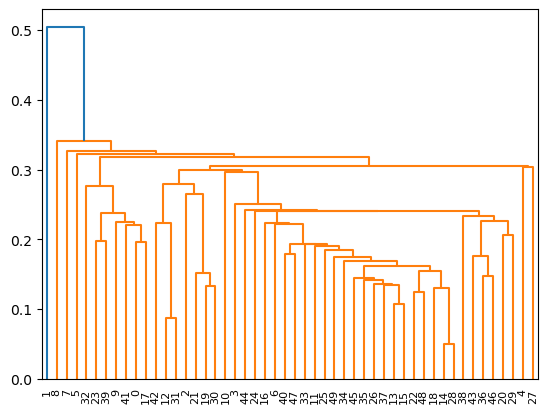

In [7]:
## Creating a dendrogam
from scipy.cluster.hierarchy import dendrogram
h_dend=dendrogram(h_link)

In [94]:
##from the above dendrogram we can see that there are 49 clusters in the beginning
## let us slice the dendrogram with 49 clusters

from sklearn.cluster import AgglomerativeClustering
Agg_clust = AgglomerativeClustering(n_clusters=10,linkage='single',affinity='euclidean').fit(h_data_norm)

In [95]:
## finding the type
type(Agg_clust)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [96]:
## Storing cluster labels into a variable
clust_labels=Agg_clust.labels_
type(clust_labels)

numpy.ndarray

In [97]:
## converrting from array to series and adding a new column in original data
h_data['Clust Labels']=pd.Series(clust_labels)

In [98]:
h_data= h_data.rename({'Clust Labels':'clust_labels'},axis=1)

In [99]:
h_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_labels,clust_labels,clust_labels,clust_labels,clust_labels,clust_labels
0,Alabama,13.2,236,58,21.2,5,2,0,2,2,2
1,Alaska,10.0,263,48,44.5,15,7,3,7,7,7
2,Arizona,8.1,294,80,31.0,12,0,0,0,12,0
3,Arkansas,8.8,190,50,19.5,13,1,0,1,13,1
4,California,9.0,276,91,40.6,14,6,0,6,14,6
5,Colorado,7.9,204,78,38.7,19,9,4,9,9,9
6,Connecticut,3.3,110,77,11.1,18,1,0,1,0,1
7,Delaware,5.9,238,72,15.8,17,8,1,8,8,8
8,Florida,15.4,335,80,31.9,23,5,2,5,11,5
9,Georgia,17.4,211,60,25.8,8,2,0,2,2,2


In [100]:
from sklearn.metrics import silhouette_score
accuracy=silhouette_score(h_data_norm,clust_labels)
accuracy*100

7.613186978994256

#                                            # K Means Clustering


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
k_data=pd.read_csv('crime_data.csv')
k_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
k_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [21]:
k_data.shape

(50, 5)

In [22]:
## Normalising Data
from sklearn.preprocessing import MinMaxScaler
k_scale=MinMaxScaler()
k_data_norm=k_scale.fit_transform(k_data.iloc[:,1:])
k_data_norm


array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [23]:
k_data_norm=pd.DataFrame(k_data_norm)
k_data_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


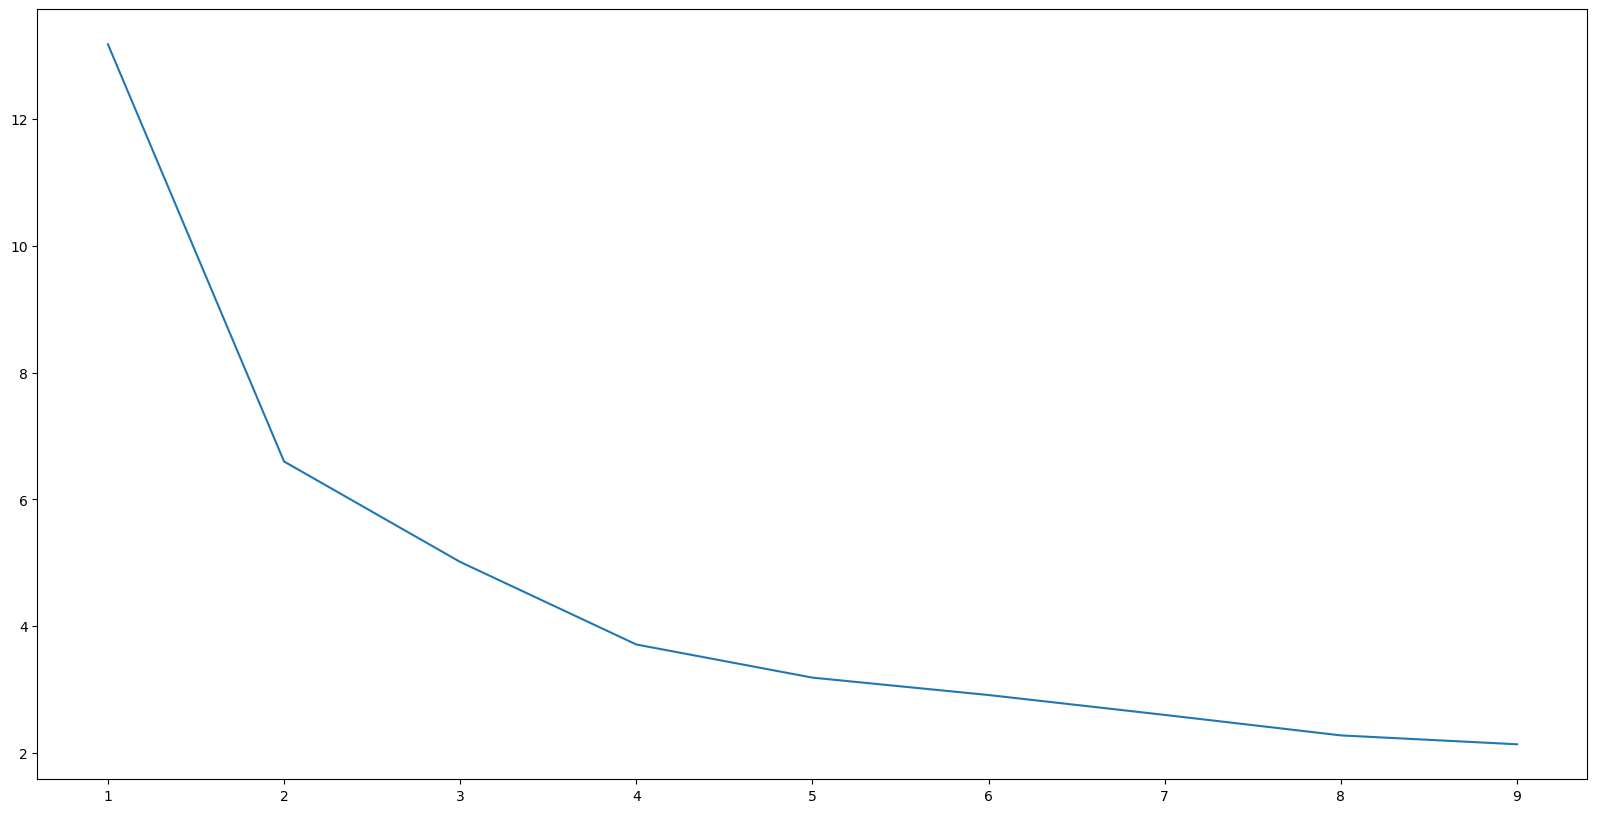

In [24]:
import warnings
warnings.simplefilter('ignore')
## find k value and WCSS Value
fig=plt.figure(figsize=(20,10))
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 10):
    clf=KMeans(n_clusters=i)
    clf=clf.fit(k_data_norm)
    WCSS.append(clf.inertia_) 
    
## Elbow Curve
plt.plot(range(1,10),WCSS)
plt.show()

In [25]:
## we can consider k value as 4
k_model=KMeans(n_clusters = 4)
y_kmeans=k_model.fit_predict(k_data_norm)

In [26]:
y_kmeans

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [27]:
k_model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [28]:
k_model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [29]:
y_pred=pd.Series(k_model.labels_)

In [30]:
k_data['clust_label']=y_pred

In [31]:
k_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust_label
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [32]:
k_data.iloc[:,1:].groupby(k_data.clust_label).mean()

,Murder,Assault,UrbanPop,Rape,clust_label
clust_label,,,,,
0,3.600000,78.538462,52.076923,12.176923,0.0
1,10.815385,257.384615,76.000000,33.192308,1.0
2,5.656250,138.875000,73.875000,18.781250,2.0
3,13.937500,243.625000,53.750000,21.412500,3.0


<Axes: xlabel='Murder', ylabel='Assault'>

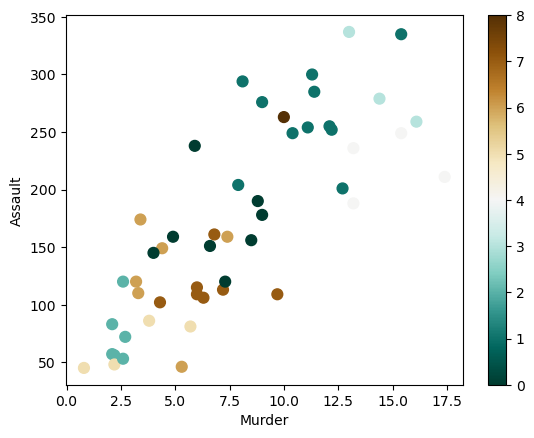

In [33]:
k_data.plot(x='Murder',y='Assault',c=clf.labels_,kind='scatter',cmap=plt.cm.BrBG_r,s=60)

# DB SCAN


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
dbscan_data=pd.read_csv('crime_data.csv')
dbscan_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [36]:
dbscan_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
dbscan_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [38]:
dbscan_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [39]:
dbscan_data.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

In [40]:
dbscan_data.shape

(50, 5)

In [41]:
dbscan_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [42]:
## Standardizing data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dbscan_data_std=scale.fit_transform(dbscan_data.iloc[:,1:])
dbscan_data_std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [43]:
##find eps value and min points 
##finding eps value using Nearest Neighbour concept
## no of nearest neighbours = 2*n = 2*4=8
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(dbscan_data_std)
distances,indices=nbrs.kneighbors(dbscan_data_std)


In [44]:
distances,indices

(array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205,
         1.29621831, 1.30273924, 1.30290503],
        [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877,
         2.35997304, 2.36811895, 2.56180471],
        [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365,
         1.22403776, 1.32378897, 1.37888923],
        [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411,
         1.30290503, 1.436899  , 1.43992053],
        [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165,
         1.6957501 , 1.81930503, 1.93115604],
        [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923,
         1.41306145, 1.54876384, 1.56244725],
        [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225,
         1.08653166, 1.22399673, 1.24051012],
        [0.        , 1.19227586, 1.27140067, 1.42312615, 1.45285466,
         1.56683387, 1.57429436, 1.59692174],
        [0.        , 1.30974334, 1.34926273, 1.45009454, 1.5890679 ,
         1.

In [45]:
distances=pd.DataFrame(distances)

In [46]:
distances

,0,1,2,3,4,5,6,7
0,0.0,0.780062,0.849285,0.925095,1.142922,1.296218,1.302739,1.302905
1,0.0,2.078984,2.136971,2.300884,2.350139,2.359973,2.368119,2.561805
2,0.0,1.048220,1.083411,1.093542,1.206214,1.224038,1.323789,1.378889
3,0.0,1.001328,1.007227,1.070570,1.241484,1.302905,1.436899,1.439921
4,0.0,1.208977,1.300691,1.323789,1.530052,1.695750,1.819305,1.931156
5,0.0,1.248863,1.300691,1.326068,1.378889,1.413061,1.548764,1.562447
6,0.0,0.881004,0.956432,0.994373,1.045972,1.086532,1.223997,1.240510
7,0.0,1.192276,1.271401,1.423126,1.452855,1.566834,1.574294,1.596922
8,0.0,1.309743,1.349263,1.450095,1.589068,1.767154,1.770765,1.789168
9,0.0,0.867978,1.022502,1.142922,1.411191,1.598929,1.775400,1.857538


In [47]:
indices=pd.DataFrame(indices)
indices

,0,1,2,3,4,5,6,7
0,0,17,41,39,9,23,19,3
1,1,30,21,19,5,41,27,24
2,2,30,31,12,21,19,4,5
3,3,49,45,16,25,0,35,41
4,4,27,5,2,21,31,30,12
5,5,21,4,24,2,27,36,30
6,6,37,20,22,48,38,26,15
7,7,35,49,45,20,15,12,29
8,8,30,21,19,31,2,17,12
9,9,17,41,0,39,23,42,19


In [48]:
distances= np.array(distances)

In [49]:
distances

array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205,
        1.29621831, 1.30273924, 1.30290503],
       [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877,
        2.35997304, 2.36811895, 2.56180471],
       [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365,
        1.22403776, 1.32378897, 1.37888923],
       [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411,
        1.30290503, 1.436899  , 1.43992053],
       [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165,
        1.6957501 , 1.81930503, 1.93115604],
       [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923,
        1.41306145, 1.54876384, 1.56244725],
       [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225,
        1.08653166, 1.22399673, 1.24051012],
       [0.        , 1.19227586, 1.27140067, 1.42312615, 1.45285466,
        1.56683387, 1.57429436, 1.59692174],
       [0.        , 1.30974334, 1.34926273, 1.45009454, 1.5890679 ,
        1.76715363, 1.770764

In [50]:
distances=np.sort(distances,axis=0)

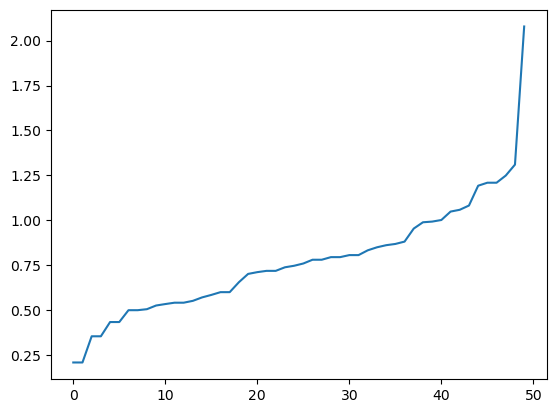

In [51]:
plt.plot(distances[:,1])

##from the below plot we can see that eps value is 1.25

In [52]:
##performing dbscan
from sklearn.cluster import DBSCAN
scan_model=DBSCAN(eps=1.25,min_samples=5)
scan_model.fit(dbscan_data_std)

DBSCAN(eps=1.25)

In [53]:
cluster_labels=pd.DataFrame(scan_model.labels_)
cluster_labels

,0
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [54]:
dbscan_data=pd.concat([dbscan_data,cluster_labels],axis=1)
dbscan_data


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,0
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


Text(0.5, 1.0, 'Clusters using DBScan')

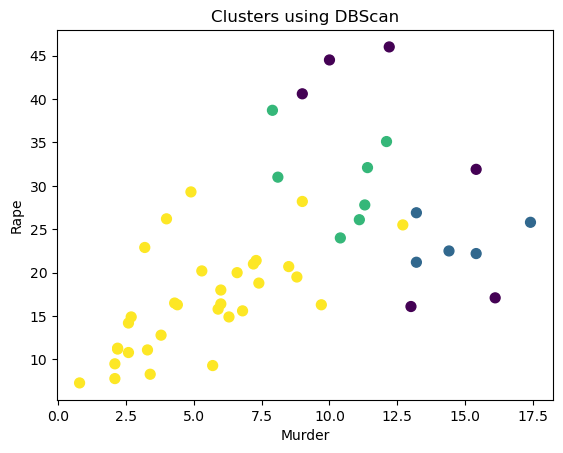

In [55]:
dbscan_data.plot(x="Murder",y ="Rape",c=cluster_labels,kind="scatter",s=50) 
plt.title('Clusters using DBScan')      

In [56]:
import sklearn
sklearn.metrics.silhouette_score(dbscan_data_std, cluster_labels) 

0.23869670053300915

In [57]:
##using Kmeans
from sklearn.cluster import KMeans

In [58]:
model=KMeans(n_clusters=3)
y_k=model.fit_predict(dbscan_data_std)
y_k=pd.DataFrame(y_k)

In [59]:
dbscan_data=pd.concat([dbscan_data,y_k],axis=1)
dbscan_data


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,0,0
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,-1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,2,0
4,California,9.0,276,91,40.6,-1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,2,2
7,Delaware,5.9,238,72,15.8,2,2
8,Florida,15.4,335,80,31.9,-1,1
9,Georgia,17.4,211,60,25.8,0,1


<Axes: xlabel='Murder', ylabel='Rape'>

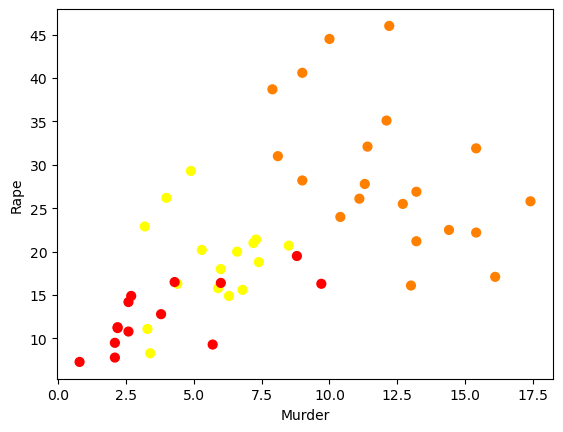

In [60]:
dbscan_data.plot(x="Murder",y="Rape",kind='scatter',s=40,c=y_k,cmap=plt.cm.autumn)

In [61]:
from sklearn.metrics import silhouette_score
sklearn.metrics.silhouette_score(dbscan_data_std,y_k)

0.30813622648945616